<h1>Excercise 5.1</h1><p>Begin by doing the necessary imports</p>

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X_flatten = np.array([x.flatten() for x in train_X])
test_X_flatten = np.array([x.flatten() for x in test_X])

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

def build_LDA(X_train, X_test, y_train, y_test):
    LDA = LinearDiscriminantAnalysis().fit(X_train, y_train)

    return accuracy_score(y_train, LDA.predict(X_train)), accuracy_score(y_test, LDA.predict(X_test))

<h1>SVD</h1><p>(a) Do an SVD analysis of the digit images. You will need to reshape each image into a column vector, and each column of your data matric is a different image.</p>

In [3]:
U, S, VT = np.linalg.svd(train_X_flatten, full_matrices=False)

(b) What does the singular value spectrum look like, and how many modes are necessary for good image reconstruction? (That is, what is the rank <i>r</i> of the digit space?)

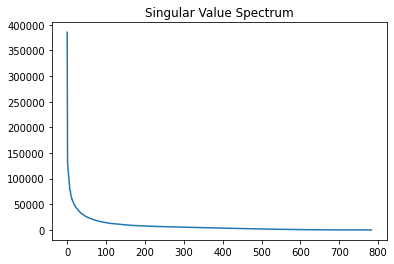

In [4]:
plt.plot(S)
plt.title("Singular Value Spectrum")
plt.show()

We see that a good elbow point is at about 50

<p>(c) What is the interpretation of the U, E, and V matrices?</p?
<ul>
<li>U: Eigen-Numbers... describes variance in columns of the MNIST data set</li>
<li>E: Singular Value of the number, importance</li>
<li>V: Weights for combinations of observations</li>
</ul>

(d) On a 3D plot, project onto three select V modes (columns) colored by their digit label, for example, columns 2, 3, and 5.

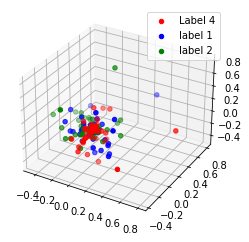

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(VT[:,2],VT[:,3],VT[:,5], c='r', marker='o', s=20, label='Label 4')
ax.scatter(VT[:,3],VT[:,2],VT[:,5], c='b', marker='o', s=20, label='label 1')
ax.scatter(VT[:,5],VT[:,3],VT[:,2], c='g', marker='o', s=20, label='label 2')
ax.legend()

(E) Pick two digits. See if you can build an LDA that can reasonably identify them

In [31]:
X_train_2 = np.concatenate((train_X_flatten[train_y == 7], train_X_flatten[train_y == 9]))
y_train_2 = np.concatenate((train_y[train_y == 7], train_y[train_y == 9]))

X_test_2 = np.concatenate((test_X_flatten[test_y == 7], test_X_flatten[test_y == 9]))
y_test_2 = np.concatenate((test_y[test_y == 7], test_y[test_y == 9]))

train_accuracy, test_accuracy = build_LDA(X_train_2, X_test_2, y_train_2, y_test_2)
print("Training Accuracy for 1 and 2:\t" + str(train_accuracy))
print("Testing Accuracy for 1 and 2:\t" + str(test_accuracy))

Training Accuracy for 1 and 2:	0.9639757655149828
Testing Accuracy for 1 and 2:	0.958271968581247


(F) Pick three digits. See if you can build an LDA that can reasonably identify them.

In [33]:
X_train_3 = np.concatenate((X_train_2, train_X_flatten[train_y == 3]))
y_train_3 = np.concatenate((y_train_2, train_y[train_y == 3]))

X_test_3 = np.concatenate((X_test_2, test_X_flatten[test_y == 3]))
y_test_3 = np.concatenate((y_test_2, test_y[test_y == 3]))

train_accuracy, test_accuracy = build_LDA(X_train_3, X_test_3, y_train_3, y_test_3)
print("Training Accuracy for 1, 2, and 3:\t" + str(train_accuracy))
print("Testing Accuracy for 1, 2, and 3:\t" + str(test_accuracy))

Training Accuracy for 1, 2, and 3:	0.9537203597710547
Testing Accuracy for 1, 2, and 3:	0.95274040039383


Which two digits in the data set are the most difficult to separate? Most east?

In [35]:
for i in range(10):
    for r in range(i + 1, 10):
        X_train = np.concatenate((train_X_flatten[train_y == i], train_X_flatten[train_y == r]))
        y_train = np.concatenate((train_y[train_y == i], train_y[train_y == r]))

        X_test = np.concatenate((test_X_flatten[test_y == i], test_X_flatten[test_y == r]))
        y_test = np.concatenate((test_y[test_y == i], test_y[test_y == r]))

        train_accuracy, test_accuracy = build_LDA(X_train, X_test, y_train, y_test)
        print("Training Accuracy for " + str(i) + " and " + str(r) + ":\t" + str(train_accuracy))
        print("Testing Accuracy for " + str(i) + " and " + str(r) + ":\t" + str(test_accuracy))

Training Accuracy for 0 and 1:	0.9947887879984209
Testing Accuracy for 0 and 1:	0.9938534278959811
Training Accuracy for 0 and 2:	0.9883848160929215
Testing Accuracy for 0 and 2:	0.9835984095427436
Training Accuracy for 0 and 3:	0.993529118964659
Testing Accuracy for 0 and 3:	0.9934673366834171
Training Accuracy for 0 and 4:	0.9963450913727157
Testing Accuracy for 0 and 4:	0.9933741080530072
Training Accuracy for 0 and 5:	0.9884520451339915
Testing Accuracy for 0 and 5:	0.9893162393162394
Training Accuracy for 0 and 6:	0.9922303859471329
Testing Accuracy for 0 and 6:	0.9876160990712074
Training Accuracy for 0 and 7:	0.9970462750246144
Testing Accuracy for 0 and 7:	0.9940239043824701
Training Accuracy for 0 and 8:	0.9887039239001189
Testing Accuracy for 0 and 8:	0.9897645854657113
Training Accuracy for 0 and 9:	0.9950303234501348
Testing Accuracy for 0 and 9:	0.9884364002011061
Training Accuracy for 1 and 2:	0.9860629921259843
Testing Accuracy for 1 and 2:	0.9820027688047993
Training Ac

6 and 9 followed by 6 and 7 are the easiest to separate, while 5 and 8 followed by 7 and 9 are the hardest to separate

(i) SVM and decision tree classifiers were the state of the art until 2014. How well do these separate between all 10 digits?

In [37]:
from sklearn.svm import SVC

svm_clf = SVC().fit(train_X_flatten, train_y)

In [38]:
print("Training Accuracy:\t" + str(accuracy_score(train_y, svm_clf.predict(train_X_flatten))))
print("Testing Accuracy:\t" + str(accuracy_score(test_y, svm_clf.predict(test_X_flatten))))

Training Accuracy:	0.9899166666666667
Testing Accuracy:	0.9792


In [40]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42).fit(train_X_flatten, train_y)

In [41]:
print("Training Accuracy:\t" + str(accuracy_score(train_y, tree_clf.predict(train_X_flatten))))
print("Testing Accuracy:\t" + str(accuracy_score(test_y, tree_clf.predict(test_X_flatten))))

Training Accuracy:	1.0
Testing Accuracy:	0.8755


SVM did better than decision tree for classifying all 10 digits. In fact it did better separating the all the digits than LDA did the two hardest.

(j) Compare the performance between LDA, SVM, and decision trees on the hardest and easiest pair of digits to separate.

In [42]:
X_train_easy = np.concatenate((train_X_flatten[train_y == 6], train_X_flatten[train_y == 7]))
y_train_easy = np.concatenate((train_y[train_y == 6], train_y[train_y == 7]))

X_test_easy = np.concatenate((test_X_flatten[test_y == 6], test_X_flatten[test_y == 7]))
y_test_easy = np.concatenate((test_y[test_y == 6], test_y[test_y == 7]))

In [43]:
LDA_easy = LinearDiscriminantAnalysis().fit(X_train_easy, y_train_easy)
SVM_easy = SVC().fit(X_train_easy, y_train_easy)
decision_tree_easy = DecisionTreeClassifier(random_state=42).fit(X_train_easy, y_train_easy)

In [45]:
print("Training Accuracy LDA:\t" + str(accuracy_score(y_train_easy, LDA_easy.predict(X_train_easy))))
print("Training Accuracy SVM:\t" + str(accuracy_score(y_train_easy, SVM_easy.predict(X_train_easy))))
print("Training Accuracy Tree:\t" + str(accuracy_score(y_train_easy, decision_tree_easy.predict(X_train_easy))))

Training Accuracy LDA:	0.9991791841090043
Training Accuracy SVM:	0.9999179184109004
Training Accuracy Tree:	1.0


In [51]:
print("Testing Accuracy LDA:\t" + str(accuracy_score(y_test_easy, LDA_easy.predict(X_test_easy))))
print("Testing Accuracy SVM:\t" + str(accuracy_score(y_test_easy, SVM_easy.predict(X_test_easy))))
print("Testing Accuracy Tree:\t" + str(accuracy_score(y_test_easy, decision_tree_easy.predict(X_test_easy))))

Testing Accuracy LDA:	0.9954682779456193
Testing Accuracy SVM:	0.998992950654582
Testing Accuracy Tree:	0.9934541792547835


In [52]:
X_train_hard = np.concatenate((train_X_flatten[train_y == 5], train_X_flatten[train_y == 8]))
y_train_hard = np.concatenate((train_y[train_y == 5], train_y[train_y == 8]))

X_test_hard = np.concatenate((test_X_flatten[test_y == 5], test_X_flatten[test_y == 8]))
y_test_hard = np.concatenate((test_y[test_y == 5], test_y[test_y == 8]))

In [53]:
LDA_hard = LinearDiscriminantAnalysis().fit(X_train_hard, y_train_hard)
SVM_hard = SVC().fit(X_train_hard, y_train_hard)
decision_tree_hard = DecisionTreeClassifier(random_state=42).fit(X_train_hard, y_train_hard)

In [54]:
print("Training Accuracy LDA:\t" + str(accuracy_score(y_train_hard, LDA_hard.predict(X_train_hard))))
print("Training Accuracy SVM:\t" + str(accuracy_score(y_train_hard, SVM_hard.predict(X_train_hard))))
print("Training Accuracy Tree:\t" + str(accuracy_score(y_train_hard, decision_tree_hard.predict(X_train_hard))))

Training Accuracy LDA:	0.9677963094393187
Training Accuracy SVM:	0.997959545777147
Training Accuracy Tree:	1.0


In [55]:
print("Testing Accuracy LDA:\t" + str(accuracy_score(y_test_hard, LDA_hard.predict(X_test_hard))))
print("Testing Accuracy SVM:\t" + str(accuracy_score(y_test_hard, SVM_hard.predict(X_test_hard))))
print("Testing Accuracy Tree:\t" + str(accuracy_score(y_test_hard, decision_tree_hard.predict(X_test_hard))))

Testing Accuracy LDA:	0.9512325830653805
Testing Accuracy SVM:	0.9957127545551983
Testing Accuracy Tree:	0.9673097534833869


As we can see all the models did good, but SVM did significantly better, almost getting perfect accuracy on even the harder to separate sets. Also the different for the easy to separate set was small, but the harder to separate was much larger.